# Перед тем как мы начнем

В двух словах про Python

Тут будет лекция

In [53]:
print("Hello world")

Hello world


In [55]:
# Комментарий
# Назначеие переменных

my_var = 5

In [56]:
if my_var > 3:
    print("This is more than 3!")
else:
    print("Not yet")

This is more than 3!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [57]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [59]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [62]:
2+2*2

6

In [63]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [44]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('HRDataset_v14.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [45]:
# Частично отрисуем этот датасет на экран
df_hr

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [46]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [47]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [48]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non


Мы проверили датасет на наличие пустых значений. 

Обратите внимание, например, что в ManagerID отсутствуют 8 значений.
Почему такое может происходить? 

Еще одно поле с пустыми значениями - DateofTermination. 
Тут все тривиально - люди еще работают, даты увольнения нет.

Обратите внимание на mean по полю MarriedID 
В распределениях Бернулли из нулей и единиц среднее окажется 
синонимично доле единиц в выборке. 


In [50]:
df_hr.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [51]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.048058,-0.043851,0.035914,0.073750,0.107406,-0.691348,0.046805,-0.115319,0.092389,-0.036488,0.026858,0.090236,-0.589664,-0.146967,-0.043730,0.495513,-0.025278
MarriedID,0.048058,1.000000,0.164044,-0.024199,0.085619,-0.119932,-0.058362,-0.012708,0.026165,0.077028,-0.027334,-0.041147,-0.094002,-0.091178,-0.126191,0.061278,0.002875,0.096086
MaritalStatusID,-0.043851,0.164044,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.099367,0.021923,0.010620,0.023065,0.033249,0.002068,-0.051093,-0.096500,0.018722
GenderID,0.035914,-0.024199,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.015741,-0.081612,0.048539,-0.043218,-0.036276,-0.044603,0.087073,0.080329,-0.004577
EmpStatusID,0.073750,0.085619,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.948058,0.221221,-0.150527,0.234222,0.024305,0.010553,-0.166560,0.078318,0.091834
DeptID,0.107406,-0.119932,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.065922,0.030294,0.290023,0.550240,-0.094940,0.031997,-0.785101,0.124630,0.053308
PerfScoreID,-0.691348,-0.058362,0.044693,-0.054915,-0.071208,-0.084811,1.000000,0.012315,0.130903,-0.089061,0.005227,-0.058350,-0.060552,0.544927,0.303579,0.045677,-0.734728,0.046629
FromDiversityJobFairID,0.046805,-0.012708,0.041117,0.031493,0.189025,-0.129998,0.012315,1.000000,0.041248,0.147717,0.015085,-0.028314,0.007570,-0.013040,-0.034468,0.031393,0.042532,0.062640
Salary,-0.115319,0.026165,-0.070291,0.056097,-0.110912,-0.448132,0.130903,0.041248,1.000000,-0.093994,-0.130563,-0.037242,-0.435406,0.064966,0.062718,0.508333,-0.069443,0.082382
Termd,0.092389,0.077028,0.099367,-0.015741,0.948058,0.065922,-0.089061,0.147717,-0.093994,1.000000,0.147042,-0.139006,0.209113,-0.017543,-0.004732,-0.147429,0.136379,0.098274


Давайте тут вспомним, что вообще такое коэффициент корреляции? От чего он зависит? О чем говорит? А о чем не говорит? В каких пределах измеряется? Какие значения КофКорр считаются значимыми? 

In [64]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['GenderID'].nunique()

2

In [100]:
# Как мы с вами только что убедились, есть только два гендера

In [66]:
# Теперь глянем, что это за гендеры?
df_hr['GenderID'].unique()

array([1, 0])

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [ ]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

In [63]:
df_hr['GenderID'].count()

311

In [64]:
df_hr['GenderID'].sum()

135

In [ ]:
# Значит у нас есть 135 объектов со значением GenderID "1" и 311-135 объектов с GenderID знеачением "0"

In [70]:
df_hr['MarriedID'].sum()

124

In [65]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15


##  Сейчас будет чуть сложнее

In [4]:
# Определим типы данных в столбцах

df_hr.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64
* float64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [4]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='Salary'>

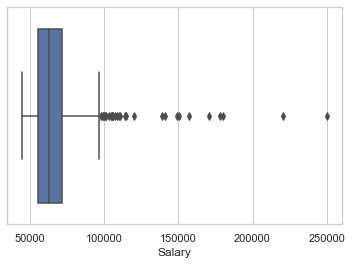

In [5]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["Salary"])

In [ ]:
# Видим, что распределение явно смещенное, все выбросы справа
# Что это за распределение? 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей

Text(0, 0.5, 'Amount of employees')

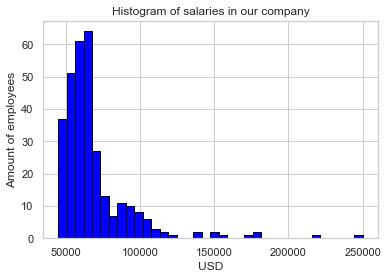

In [61]:
# matplotlib histogram
plt.hist(df_hr['Salary'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что распределение похоже на Лог-нормальное, 
# но мы его еще не проходили, поэтому ничего по нему проверить не можем, 
# а просто степенно ждем пары по статистике. 

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [8]:
import numpy as np

In [14]:
# Среднее значение по зарплате
np.mean(df_hr.Salary)

69020.6848874598

In [19]:
# А медиана? 
np.median(df_hr.Salary)

62810.0

In [ ]:
# Обращает внимание что медиана ниже среднего значения где-то на 7000. 
# О чем это говорит? 

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [12]:
# Variance (дисперсия) зарплат
np.var(df_hr.Salary)

630821473.6306077

In [13]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.Salary)

25116.159611505253

In [71]:
3*np.std(df_hr.Salary)

75348.47883451576

In [76]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?

# Сделаем подвыборку из выборки

In [28]:
# Выделим в отдельные массивы сотрудников с разными GenderID
df_hr_g1 = df_hr[df_hr['GenderID'] == 1]
df_hr_g0 = df_hr[df_hr['GenderID'] == 0]

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15


In [29]:
df_hr_g0.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19


In [67]:
mylist = [2,33,4,5]

In [40]:
print("Count of Gender_ID = 1\
 is {} and for Gender_ID = 0 is {}".format(len(df_hr_g1),
                                           len(df_hr_g0)))

Count of Gender_ID = 1 is 135 and for Gender_ID = 0 is 176


In [41]:
print("Median of salary for Gender_ID = 1 \
is {} and for Gender_ID = 0 is {}".format(np.median(df_hr_g1.Salary),
                                           np.median(df_hr_g0.Salary)))

Median of salary for Gender_ID = 1 is 63353.0 and for Gender_ID = 0 is 62066.5


<AxesSubplot:xlabel='Salary'>

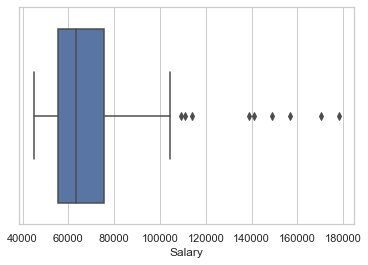

In [37]:
sns.boxplot(x=df_hr_g1["Salary"])

<AxesSubplot:xlabel='Salary'>

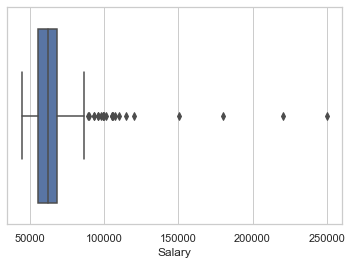

In [43]:
sns.boxplot(x=df_hr_g0["Salary"])

Text(0, 0.5, 'Amount of employees')

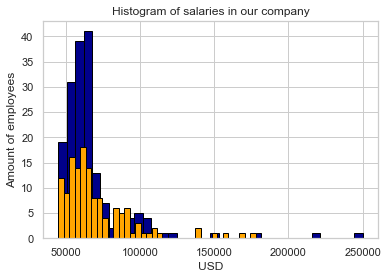

In [56]:
plt.hist(df_hr_g0['Salary'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['Salary'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что хотя количество объектов и отличаются (высота столбиков),
# в самих распределениях нет особых различий

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [9]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_sal'] = np.where(
                            df_hr['Salary'] > 
                            np.mean(df_hr.Salary) + 3*np.std(df_hr.Salary),                 
                            1, 0)

In [10]:
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,anomally_sal
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15,1
96,"Foss, Jason",10015,0,0,1,1,3,4,0,178000,...,5.0,Indeed,Exceeds,5.00,5,5,1/7/2019,0,15,1
131,"Houlihan, Debra",10272,1,1,0,1,6,3,0,180000,...,2.0,LinkedIn,Fully Meets,4.50,4,0,1/21/2019,0,19,1
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,...,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10,1
190,"Monroe, Peter",10288,1,1,1,1,3,2,1,157000,...,5.0,Diversity Job Fair,Needs Improvement,2.39,3,6,2/22/2019,4,13,1
240,"Roper, Katie",10086,0,0,0,1,3,3,0,150290,...,13.0,Indeed,Fully Meets,4.94,3,5,2/6/2019,0,17,1
244,"Ruiz, Ricardo",10222,0,2,1,5,3,3,1,148999,...,5.0,Diversity Job Fair,Fully Meets,4.30,4,6,1/4/2015,0,8,1
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,1


In [ ]:
"""

У нас получилось 8 человек с ультравысокой зарплатой. 
Вероятно мы нашли лидеров бизнеса или людей, на которых компания делает ставку

Обратите внимание на их оценки перформанса (PerformanceScore), 
оценку уровня вовлеченности (EngagementSurvey). 

Какие предварительные выводы/гипотезы можно сделать? 


"""

## Оценка абсентеизма - количества отсутствий на рабочем месте

(array([14., 21., 16., 23., 12., 16., 21., 11., 14., 10., 15.,  8., 17.,
        17., 20., 23., 15.,  8., 16., 14.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

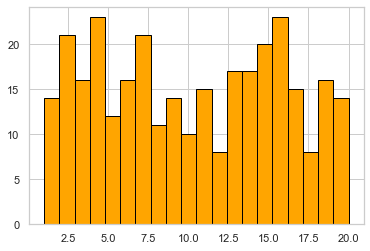

In [7]:
plt.hist(df_hr['Absences'], color = 'orange', edgecolor = 'black', bins = 20)

Каких-то заментых возмущений не наблюдается, распределение плюс-минус случайное. 

Из метода .describe() выше нам известно, что 75-перцентиль количества отсутствий находится на уровне 15. 

Давайте также посчитаем где лежит 90-й перцентиль. 



In [90]:
df_hr.Absences.quantile(q=0.9)

18.0

Это означает, что 90% сотрудников в выборке имеют менее 18 отсутствий.

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого 18 и более отсутствий. 

In [98]:
df_hr_ab = df_hr[df_hr['Absences'] > 17]
df_hr_ab

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,anomally_sal
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19,0
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19,0
15,"Bates, Norman",10061,0,0,1,4,5,3,0,57834,1,19,Production Technician I,MA,2050,10/18/81,M,Single,US Citizen,No,White,2/21/2011,8/4/2017,attendance,Terminated for Cause,Production,Kelley Spirea,18.0,Google Search,Fully Meets,5.00,4,0,4/5/2017,0,20,0
22,"Billis, Helen",10003,1,1,0,1,5,4,0,62910,0,19,Production Technician I,MA,2031,09/01/89,F,Married,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Indeed,Exceeds,5.00,3,0,2/27/2019,0,19,0
32,"Bunbury, Jessica",10188,1,1,0,5,6,3,0,74326,1,3,Area Sales Manager,VA,21851,06/01/64,F,Married,Eligible NonCitizen,No,Black or African American,8/15/2011,8/2/2014,Another position,Voluntarily Terminated,Sales,John Smith,17.0,Google Search,Fully Meets,3.14,5,0,2/10/2013,1,19,0
61,"Daniele, Ann",10212,1,1,0,3,3,3,0,85028,0,28,Sr. Network Engineer,CT,6033,01/18/52,F,Married,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,LinkedIn,Fully Meets,3.10,5,8,2/12/2019,0,19,0
85,"Evensen, April",10296,0,0,0,4,5,2,0,59124,1,19,Production Technician I,MA,2458,05/06/89,F,Single,US Citizen,No,White,2/17/2014,2/25/2018,"no-call, no-show",Terminated for Cause,Production,Elijiah Gray,16.0,Google Search,Needs Improvement,2.30,3,0,1/15/2017,5,19,0
86,"Exantus, Susan",10290,1,1,0,4,4,2,0,99280,1,24,Software Engineer,MA,1749,05/15/87,F,Married,US Citizen,No,Black or African American,5/2/2011,6/5/2013,attendance,Terminated for Cause,Software Engineering,Alex Sweetwater,10.0,Indeed,Needs Improvement,2.10,5,4,8/10/2012,4,19,0
92,"Fidelia, Libby",10049,1,1,0,1,5,3,0,58530,0,19,Production Technician I,MA,2155,03/16/81,F,Married,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Google Search,Fully Meets,5.00,5,0,1/29/2019,0,19,0
93,"Fitzpatrick, Michael J",10093,0,0,1,5,5,3,0,72609,1,20,Production Technician II,MA,2143,10/01/81,M,Single,US Citizen,Yes,White,5/16/2011,6/24/2013,hours,Voluntarily Terminated,Production,Amy Dunn,11.0,Google Search,Fully Meets,4.76,5,0,4/5/2013,0,20,0


Получили 38 человек. У всех у них по 19 или 20 отсутствий. 

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Набор содержит информацию о 311 сотрудниках, часть из которых уже покинули компанию. Исторические данные смешаны с фактическими данными о сотрудниках
2. Зарплаты между гендерами распределены скорее всего равномерно, явных искажений не наблюдается
3. Отсутствия распределены предположительно случайно от 0 до 20, ни у кого нет более 20 отсутствий
4. У нас в выборке 38 человек с 18 отсутствиями или более, это больше чем у 90% персонала. 

# Выводы по заданию

Что мы сейчас сделали: 
1. Загрузили датасет
2. Провели по нему ряд базовых проверок
3. Научились считать базовые вещи - медиану, стандартное отклонение, дисперсию etc
4. Научились рисовать базовые графички с распределениями
5. Начились дробить датасеты по условию (делать подвыборки)

# В домашке вас ждет

* Сделайте все тоже самое, но на примере другого набора данных. На выходе должны получится достоверные результаты разведочного исследования (как в части "Выводы по набору данных")
* Превращаем знания в навыки

## Pro tip: 

* В ходе выполнения домашки вам может потребоваться итерация вопрос-ответ с коллегами или преподавателем. Начинайте делать домашку заранее, чтобы оставить в запасе больше времени на итерации вопрос-ответов и прояснение ситуации. Это работает не только с домашками. 